# 인공지능과 가위바위보하기 미니프로젝트

### 1. 라이브러리 초기화

In [114]:
from PIL import Image
import glob
import os

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [115]:
img_size = 28

### 2. 데이터 불러오기 + Resize하기

In [149]:
def resize_images(img_path, img_size):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(img_size,img_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [150]:
train_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

In [151]:
# 이미지 사이즈 변환 (변환은 한번만)

resize_images(train_image_dir_path + '/scissor', img_size)
print("가위 이미지 resize 완료!")

resize_images(train_image_dir_path + '/paper', img_size)
print("보 이미지 resize 완료!")

resize_images(train_image_dir_path + '/rock', img_size)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


### 3. 데이터 수치화하기

In [152]:
def load_data(img_path, img_size, number_of_data=300):
    # 가위 : 0, 바위 : 1, 보: 2
    
    color=3
    
    # 이미지 데이터와 라벨(가위:0, 바위:1, 보:2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    # imgs = 데이터 갯수 * 이미지 크기 * 색상(RGB=3) -> 각 이미지의 [이미지크기*색상]으로 구성된 배열들의 집합
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    # labels = 데이터 갯수
    labels=np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위 : 0
        idx = idx+1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위 : 1
        idx = idx+1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보 : 2
        idx = idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [153]:
(x_train, y_train) = load_data(train_image_dir_path, img_size)
x_train_norm = x_train / 255.0 # 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 50, 50, 3)
y_train shape: (300,)


라벨: 0


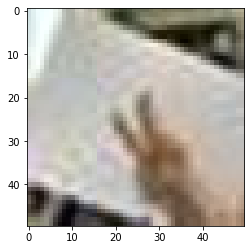

In [154]:
plt.imshow(x_train[0])
print('라벨:', y_train[0])

### 4. 딥러닝 네트워크 설계하기

In [155]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print(f'Model에 추가된 Layer 개수: {len(model.layers)}')

model.summary()

Model에 추가된 Layer 개수: 7
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3872)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                123936    
_________________________________________________________________
dense_43 (Dense)             (

### 5. 딥러닝 네트워크 학습시키기

In [156]:
print("x_train_norm shape: {}".format(x_train_norm.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

x_train_norm shape: (300, 50, 50, 3)
Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1061 - accuracy: 0.3167
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.4667
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9951 - accuracy: 0.5900
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8474 - accuracy: 0.6767
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.8233
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.9167
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9400
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9767
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0850 -

### 6. 테스트하기

##### 테스트 데이터 로드하기

In [157]:
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"

In [158]:
# 이미지 사이즈 변환 (변환은 한번만)

resize_images(test_image_dir_path + '/scissor', img_size)
print("가위 이미지 resize 완료!")

resize_images(test_image_dir_path + '/paper', img_size)
print("보 이미지 resize 완료!")

resize_images(test_image_dir_path + '/rock', img_size)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [159]:
(x_test, y_test) = load_data(test_image_dir_path, img_size)
x_test_norm = x_test / 255 # 정규화 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 50, 50, 3)
y_test shape: (300,)


라벨: 0


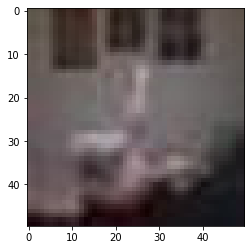

In [160]:
plt.imshow(x_test[0])
print('라벨:', y_test[0])

##### test accuracy 측정

In [161]:
# print(x_test_norm.shape)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

10/10 - 0s - loss: 1.5688 - accuracy: 0.4500
test_loss: 1.5687782764434814
test_accuracy: 0.44999998807907104


---

### 더 좋은 네트워크 만들어보기

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x shape: (300, 50, 50, 3)
y shape: (300,)
라벨: 0
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x shape: (300, 50, 50, 3)
y shape: (300,)
라벨: 0


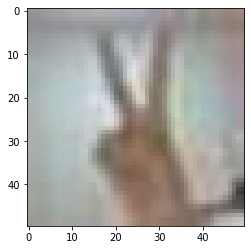

In [145]:
# 이미지 사이즈, 경로 변경 시 처리

img_size = 50

def imageProcess(image_dir_path):
    resize_images(image_dir_path + '/scissor', img_size)
    print("가위 이미지 resize 완료!")

    resize_images(image_dir_path + '/paper', img_size)
    print("보 이미지 resize 완료!")

    resize_images(image_dir_path + '/rock', img_size)
    print("바위 이미지 resize 완료!")

    (x, y) = load_data(image_dir_path, img_size)
    x_norm = x / 255.0 # 정규화

    print("x shape: {}".format(x.shape))
    print("y shape: {}".format(y.shape))

    plt.imshow(x[0])
    print('라벨:', y[0])

    return x, y, x_norm


train_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/jiho"
x_train, y_train, x_train_norm = imageProcess(train_image_dir_path)

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/hyeji"
x_test, y_test, x_test_norm = imageProcess(test_image_dir_path)

In [146]:
# 학습

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print(f'Model에 추가된 Layer 개수: {len(model.layers)}')

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)


# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model에 추가된 Layer 개수: 7
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 3872)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                123936    
_________________________________________________________________
dense_41 (Dense)             (

---

# 회고

### 1. 어려웠던 점
```
accuracy를 올리기 위해 이것저것 방법을 찾는것이 쉽지 않았는데요. 
hyper parameter를 얼마나 올려야 하나 그 지점을 찾는게 (망망대해 같아서) 쉽지 않았습니다.
```

### 2. 알아낸 점 혹은 아직 모호한 점
* training과 test 이미지의 크기 & 퀄리티가 accuracy에 영향이 미친다는 점을 알았습니다.
* 하이퍼 파라미터가 무작정 크기만 하다고 accuracy가 잘 나오지 않다는 걸 알았습니다.
* 그래도 일정 적정 수준으로 늘리면 accuracy가 높아졌습니다.

### 3. 시도한 것들
##### a. 이미지 처리
1. 이유
    - 배경과 손이 구분이 잘 안되서
    - 이미지 사이즈 변경 후 이미지가 많이 뭉개져서
2. 처리방법
    - 배경과 손 구분이 잘된 이미지로 변경하고
    - 이미지 크기를 28x28 -> 50x50으로 변경했습니다.

##### b. hyper parameter 변경
1. 이유
    - hyper parameter들을 적절히 변경하면서 더 좋은 accuracy를 찾고자 노력했습니다. 
2. 처리방법
    - Conv2D와 Dense를 조절해도 크게 달라지는 부분을 찾을 수 없었지만
    - 학습을 10회 -> 20회로 늘려 accuracy가 크게 증가할 수 있었습니다.

### 4. 루브릭 지표를 달성하지 못한 부분과 이유 
* 루브릭 지표 모두 달성했습니다.

### 5. 자기 다짐
```
accuracy가 80 안팍으로 나와서... 더 높은 accuracy와 낮은 loss를 찾아내고 싶었습니다.
사실 아직은 처리방법에 있어서 "샘플데이터 보완, hyper parameter 변경"에 그쳤는데요.
현재는 공부했던 layers만 가지고 처리해서 그런 것은 아닐지 싶기도 하고...
딥러닝에 다른 방법이 있지 않을까 하는 호기심도 들었어요.
배운 "accuracy를 높일 수 있는 여러 방법들"을 잘 기억해두고, 나중에 더 나은 accuracy, loss를 도출해내자! 생각했습니다.
```